In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('melb_data.csv')

In [42]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [43]:
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [44]:
df.shape

(13580, 21)

In [45]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [46]:
df.drop(columns = ['Address','Postcode','SellerG','Lattitude','Longtitude'] , inplace = True)

In [47]:
df.dropna(subset = ['Price','Bedroom2','Distance','Bedroom2','Bathroom',
                   'Car','CouncilArea','Regionname','Propertycount'] , inplace = True)

In [48]:
df.fillna({'BuildingArea': df['BuildingArea'].ffill(limit=2),
           'YearBuilt' : df['YearBuilt'].ffill(limit=2)} , inplace = True)

In [49]:
df.fillna({'BuildingArea': df['BuildingArea'].bfill(limit=2),
           'YearBuilt' : df['YearBuilt'].bfill(limit=2)} , inplace = True)

In [50]:
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Price,0
Method,0
Date,0
Distance,0
Bedroom2,0
Bathroom,0
Car,0


In [51]:
df.dropna(inplace = True)

In [52]:
df.shape

(11851, 16)

In [53]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 11851
Number of Columns : 16


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11851 entries, 0 to 12212
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         11851 non-null  object 
 1   Rooms          11851 non-null  int64  
 2   Type           11851 non-null  object 
 3   Price          11851 non-null  float64
 4   Method         11851 non-null  object 
 5   Date           11851 non-null  object 
 6   Distance       11851 non-null  float64
 7   Bedroom2       11851 non-null  float64
 8   Bathroom       11851 non-null  float64
 9   Car            11851 non-null  float64
 10  Landsize       11851 non-null  float64
 11  BuildingArea   11851 non-null  float64
 12  YearBuilt      11851 non-null  float64
 13  CouncilArea    11851 non-null  object 
 14  Regionname     11851 non-null  object 
 15  Propertycount  11851 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.5+ MB


In [55]:
df.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Price,0
Method,0
Date,0
Distance,0
Bedroom2,0
Bathroom,0
Car,0


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,11851.0,2.893427e+00,0.960942,1.0,2.0,3.0,3.0,10.0
Price,11851.0,1.062003e+06,639300.942824,85000.0,637250.0,890000.0,1316750.0,9000000.0
Distance,11851.0,9.768998e+00,5.511379,0.0,6.1,9.2,12.6,47.4
Bedroom2,11851.0,2.868028e+00,0.971040,0.0,2.0,3.0,3.0,20.0
Bathroom,11851.0,1.519112e+00,0.690283,0.0,1.0,1.0,2.0,8.0
Car,11851.0,1.572610e+00,0.949184,0.0,1.0,1.0,2.0,10.0
Landsize,11851.0,5.440161e+02,4224.626136,0.0,159.0,400.0,644.0,433014.0
BuildingArea,11851.0,1.449668e+02,122.873384,0.0,91.0,125.0,172.0,6791.0
YearBuilt,11851.0,1.964680e+03,38.312442,1196.0,1940.0,1970.0,2000.0,2018.0
Propertycount,11851.0,7.441822e+03,4356.702029,249.0,4385.0,6567.0,10331.0,21650.0


In [57]:
df.describe(exclude=np.number)

,Suburb,Type,Method,Date,CouncilArea,Regionname
count,11851,11851,11851,11851,11851,11851
unique,307,3,5,52,33,8
top,Reservoir,h,S,27/05/2017,Moreland,Southern Metropolitan
freq,308,7935,7863,454,1149,4227


In [58]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Suburb,11851,0,0.0,307
Rooms,11851,0,0.0,9
Type,11851,0,0.0,3
Price,11851,0,0.0,2083
Method,11851,0,0.0,5
Date,11851,0,0.0,52
Distance,11851,0,0.0,198
Bedroom2,11851,0,0.0,12
Bathroom,11851,0,0.0,9
Car,11851,0,0.0,11


In [59]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers

    return outlier_indices

numerical_columns = ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize",
                     "BuildingArea", "YearBuilt", "Propertycount"]
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Price: 532 outliers detected
Distance: 349 outliers detected
Bedroom2: 541 outliers detected
Bathroom: 125 outliers detected
Car: 532 outliers detected
Landsize: 323 outliers detected
BuildingArea: 615 outliers detected
YearBuilt: 4 outliers detected
Propertycount: 308 outliers detected


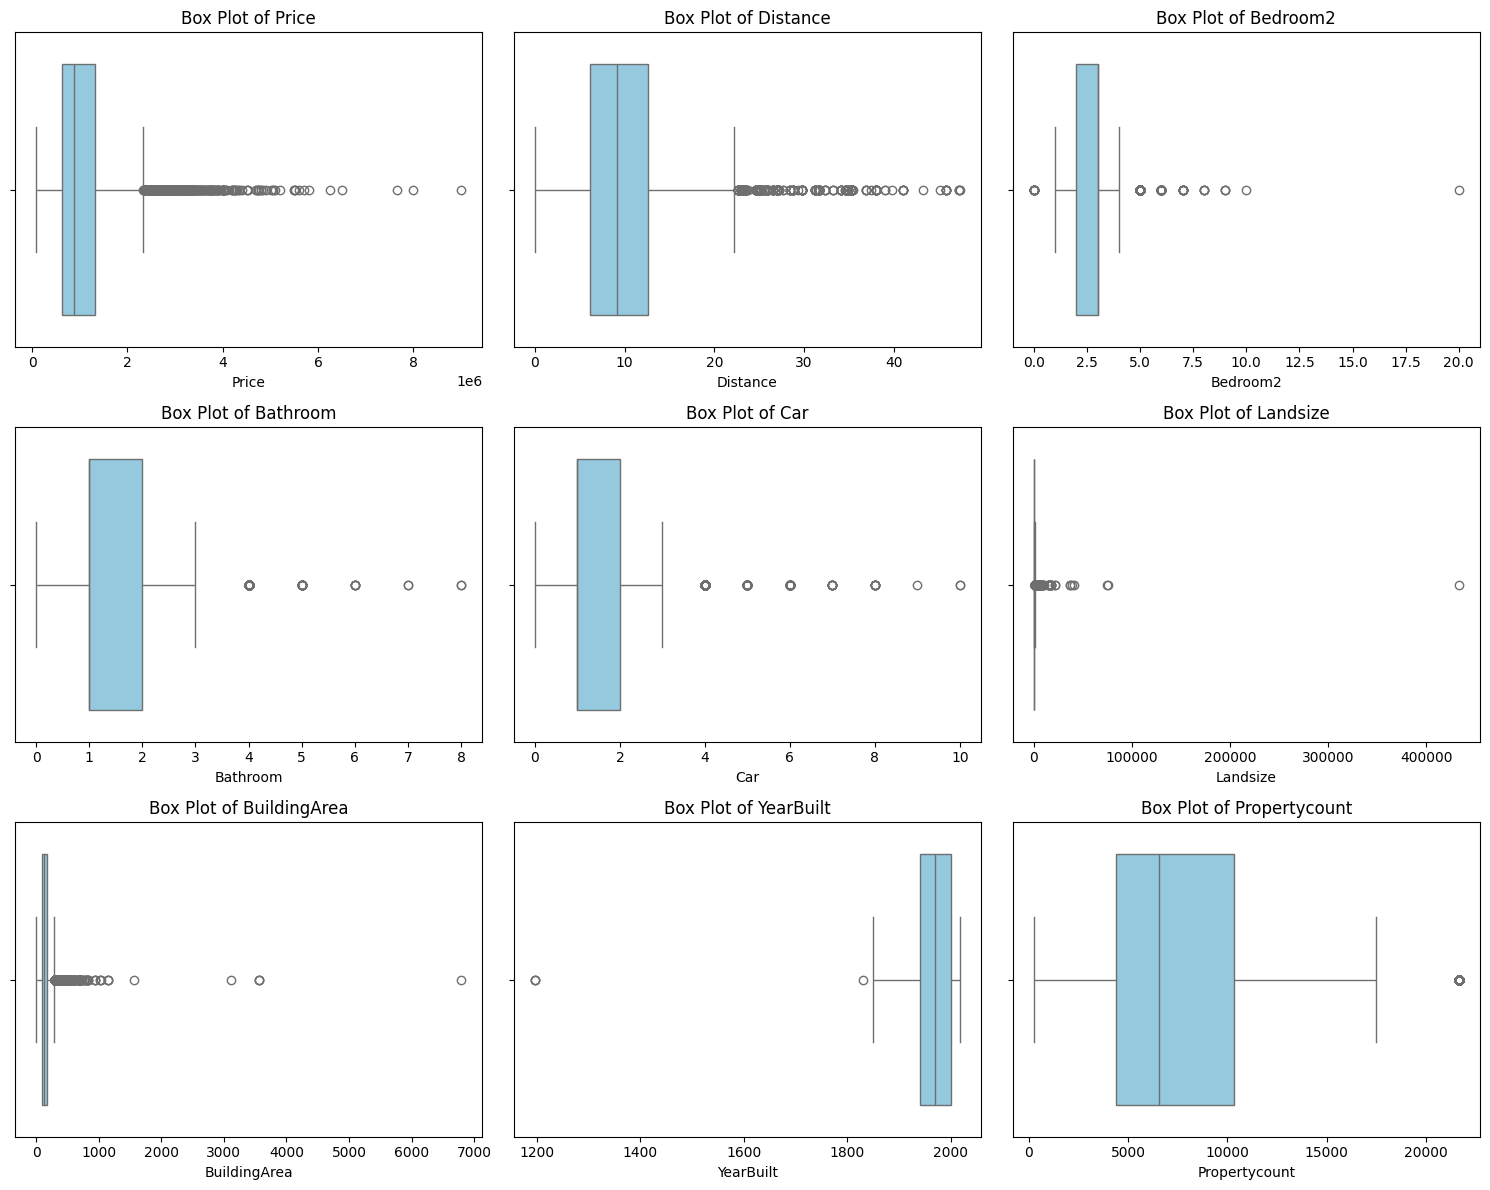

In [60]:
numerical_columns = ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize",
                     "BuildingArea", "YearBuilt", "Propertycount"]
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [61]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]

    return df_clean

numerical_columns =  ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Propertycount"]

df_cleaned = remove_outliers(df, numerical_columns)

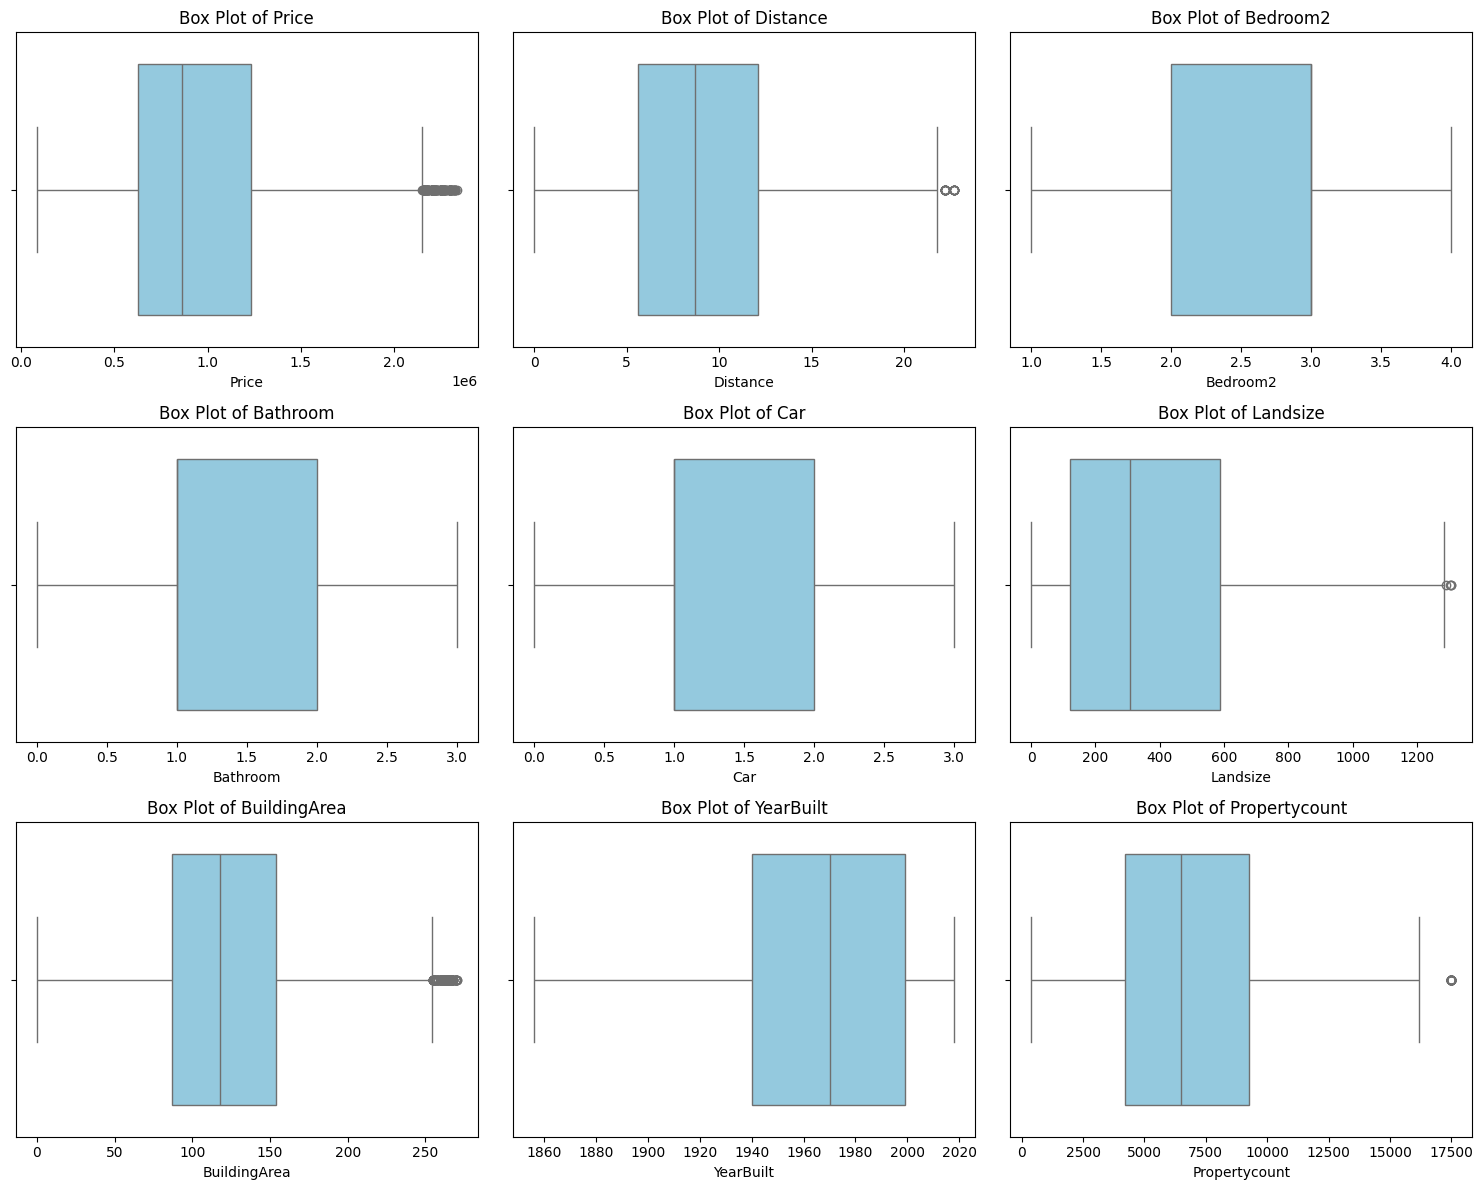

In [62]:
numerical_columns = ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize",
                     "BuildingArea", "YearBuilt", "Propertycount"]
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [63]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.sample(5)

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
1430,Caulfield South,4,h,1570000.0,S,28/05/2016,9.3,3.0,2.0,2.0,641.0,215.0,1970.0,Glen Eira,Southern Metropolitan,5051.0
1009,Brunswick,1,u,440000.0,S,22/08/2016,5.2,1.0,1.0,1.0,0.0,104.0,1890.0,Moreland,Northern Metropolitan,11918.0
2706,Kealba,3,h,365000.0,SP,7/05/2016,15.0,3.0,1.0,0.0,543.0,114.0,1975.0,Brimbank,Western Metropolitan,1202.0
5790,Cremorne,3,h,1300000.0,S,28/05/2016,2.5,2.0,2.0,2.0,138.0,108.0,2001.0,Yarra,Northern Metropolitan,1123.0
5904,Bentleigh East,3,h,986000.0,S,8/04/2017,13.9,3.0,1.0,3.0,337.0,100.0,1950.0,Glen Eira,Southern Metropolitan,10969.0


In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9149 entries, 0 to 9148
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9149 non-null   object 
 1   Rooms          9149 non-null   int64  
 2   Type           9149 non-null   object 
 3   Price          9149 non-null   float64
 4   Method         9149 non-null   object 
 5   Date           9149 non-null   object 
 6   Distance       9149 non-null   float64
 7   Bedroom2       9149 non-null   float64
 8   Bathroom       9149 non-null   float64
 9   Car            9149 non-null   float64
 10  Landsize       9149 non-null   float64
 11  BuildingArea   9149 non-null   float64
 12  YearBuilt      9149 non-null   float64
 13  CouncilArea    9149 non-null   object 
 14  Regionname     9149 non-null   object 
 15  Propertycount  9149 non-null   float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.1+ MB


In [65]:
df.drop(columns = ['Suburb'], inplace = True)

In [66]:
df.head()

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,4/03/2017,2.5,3.0,2.0,1.0,94.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0


In [67]:
from sklearn.preprocessing import LabelEncoder
column_to_encode = df_cleaned.select_dtypes(object)
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [68]:
df_cleaned.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,0,2,0,1480000.0,1,40,2.5,2.0,1.0,1.0,202.0,79.0,1900.0,26,1,4019.0
1,0,2,0,1035000.0,1,42,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,26,1,4019.0
2,0,3,0,1465000.0,3,43,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,26,1,4019.0
3,0,3,0,850000.0,0,43,2.5,3.0,2.0,1.0,94.0,150.0,1900.0,26,1,4019.0
4,0,4,0,1600000.0,4,44,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,26,1,4019.0


In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9149 entries, 0 to 9148
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9149 non-null   int64  
 1   Rooms          9149 non-null   int64  
 2   Type           9149 non-null   int64  
 3   Price          9149 non-null   float64
 4   Method         9149 non-null   int64  
 5   Date           9149 non-null   int64  
 6   Distance       9149 non-null   float64
 7   Bedroom2       9149 non-null   float64
 8   Bathroom       9149 non-null   float64
 9   Car            9149 non-null   float64
 10  Landsize       9149 non-null   float64
 11  BuildingArea   9149 non-null   float64
 12  YearBuilt      9149 non-null   float64
 13  CouncilArea    9149 non-null   int64  
 14  Regionname     9149 non-null   int64  
 15  Propertycount  9149 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 1.1 MB


In [70]:
X = df_cleaned.drop(['Price','Date'] , axis = 1)
y = df_cleaned['Price']

In [71]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model,model_name):
    score = r2_score(y_test , model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Kfold(lr,'Linear Regression')
train(lr,'Linear Regression')
r2(lr,'Linear Regression')

Linear Regression score on cross validation: 50.563612641415844%
Linear Regression model score on Training data: 52.44244606958998%
Linear Regression model score on Testing data: 53.08682770752331%
R2 Score for Linear Regression is 53.08682770752331%


In [75]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100 , max_depth = 10)
Kfold(rf_model, "Random Forest")
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest score on cross validation: 74.90442429607484%
Random Forest model score on Training data: 88.5908438849103%
Random Forest model score on Testing data: 79.4122060833819%
R2 Score for Random Forest is 79.4122060833819%


In [76]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(n_estimators = 50)
Kfold(bag,'Bagging')
train(bag,'Bagging')
r2(bag,'Bagging')

Bagging score on cross validation: 75.98764782433085%
Bagging model score on Training data: 96.9573548378132%
Bagging model score on Testing data: 79.98588845326728%
R2 Score for Bagging is 79.98588845326728%


In [77]:
from sklearn.ensemble import GradientBoostingRegressor
GrBoost = GradientBoostingRegressor(n_estimators = 200)
Kfold(GrBoost,'Gradient Boosting')
train(GrBoost,'Gradient Boosting')
r2(GrBoost,'Gradient Boosting')

Gradient Boosting score on cross validation: 77.25693007788655%
Gradient Boosting model score on Training data: 82.45319702331368%
Gradient Boosting model score on Testing data: 80.67441265269603%
R2 Score for Gradient Boosting is 80.67441265269603%


In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
Kfold(knn,'KNN')
train(knn,'KNN')
r2(knn,'KNN')

KNN score on cross validation: 62.702218104723684%
KNN model score on Training data: 77.70300399151402%
KNN model score on Testing data: 68.35738657595839%
R2 Score for KNN is 68.35738657595839%


In [79]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
Kfold(DTR,'Decision Tree')
train(DTR,'Decision Tree')
r2(DTR,'Decision Tree')

Decision Tree score on cross validation: 51.20139032765746%
Decision Tree model score on Training data: 99.990161494479%
Decision Tree model score on Testing data: 59.69803073457369%
R2 Score for Decision Tree is 59.69803073457369%


In [80]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()
Kfold(xgboost, "XGBoost")
train(xgboost, "XGBoost")
r2(xgboost, "XGBoost")

XGBoost score on cross validation: 77.14727975081806%
XGBoost model score on Training data: 94.95409863190399%
XGBoost model score on Testing data: 80.71940896321945%
R2 Score for XGBoost is 80.71940896321945%
